# Check outputs

In [1]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

In [2]:
path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run'
path2 = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run_SCF_1'

In [3]:
!ls {path}

actlyr_daily.nc		   gpp_daily.nc		     ra_monthly.nc
actlyrmax_monthly.nc	   gpp_monthly.nc	     rh_daily.nc
actlyrmin_monthly.nc	   hfg_monthly.nc	     rh_monthly.nc
actlyr_monthly.nc	   hfls_daily.nc	     rls_daily.nc
albs_daily.nc		   hfls_monthly.nc	     rls_monthly.nc
albsir_daily.nc		   hfss_daily.nc	     rsds_monthly.nc
albs_monthly.nc		   hfss_monthly.nc	     rSoil_monthly.nc
albsn_daily.nc		   lai_daily.nc		     rss_daily.nc
albsn_monthly.nc	   lai_monthly.nc	     rss_monthly.nc
albsvis_daily.nc	   landCoverFrac_monthly.nc  sftlf.nc
bleafmas_daily.nc	   mrrob_daily.nc	     snc_daily.nc
cLeaf_daily.nc		   mrrob_monthly.nc	     snc_monthly.nc
cLeaf_monthly.nc	   mrroc_daily.nc	     snd_daily.nc
cRoot_daily.nc		   mrro_daily.nc	     snd_monthly.nc
cRoot_monthly.nc	   mrroi_daily.nc	     snm_daily.nc
cSoil_monthly.nc	   mrro_monthly.nc	     snw_daily.nc
cStem_daily.nc		   mrron_daily.nc	     snwdens_daily.nc
cStem_monthly.nc	   mrros_daily.nc	     snw_monthly.nc
cVeg_monthly.nc		 

As we generally start the C pools, etc. from zero it takes several runs to spin up sites. Especially the high-latitude sites tend to be slower to spin up. To check whether the model is spun up, we usually look at the outputs for NBP, soil C, etc. to see whether they’re relatively stable or close to zero for NBP averaged over several years. An easy check is to look at the ratio of NEP/NPP. We usually say that a site is spun up, if the absolute value of NEP/NPP is less than 0.02.

In [7]:
freq = 'daily'
label = 'run'

tas_daily = xr.open_dataset(path+'/tas_'+freq+'.nc').tas
snc_daily = xr.open_dataset(path+'/snc_'+freq+'.nc').snc
snd_daily = xr.open_dataset(path+'/snd_'+freq+'.nc').snd
snw_daily = xr.open_dataset(path+'/snw_'+freq+'.nc').snw
nbp_daily = xr.open_dataset(path+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep_daily = xr.open_dataset(path+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp_daily = xr.open_dataset(path+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
lai_daily = xr.open_dataset(path+'/lai_'+freq+'.nc').lai # Carbon mass in the full depth of the soil model

albs_daily = xr.open_dataset(path+'/albs_'+freq+'.nc').albs
albsn_daily = xr.open_dataset(path+'/albsn_'+freq+'.nc').albsn

tsn_daily = xr.open_dataset(path+'/tsn_'+freq+'.nc').tsn
ts_daily = xr.open_dataset(path+'/ts_'+freq+'.nc').ts
wsnw_daily = xr.open_dataset(path+'/wsnw_'+freq+'.nc').wsnw
tsl_daily = xr.open_dataset(path+'/tsl_'+freq+'.nc').tsl
tcs_daily = xr.open_dataset(path+'/tcs_'+freq+'.nc').tcs

In [6]:
freq = 'daily'
label2 = 'run_SCF_1'

tas_daily2 = xr.open_dataset(path2+'/tas_'+freq+'.nc').tas
snc_daily2 = xr.open_dataset(path2+'/snc_'+freq+'.nc').snc
snd_daily2 = xr.open_dataset(path2+'/snd_'+freq+'.nc').snd
snw_daily2 = xr.open_dataset(path2+'/snw_'+freq+'.nc').snw
nbp_daily2 = xr.open_dataset(path2+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep_daily2 = xr.open_dataset(path2+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp_daily2 = xr.open_dataset(path2+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
lai_daily2 = xr.open_dataset(path2+'/lai_'+freq+'.nc').lai # Carbon mass in the full depth of the soil model

albs_daily2 = xr.open_dataset(path2+'/albs_'+freq+'.nc').albs
albsn_daily2 = xr.open_dataset(path2+'/albsn_'+freq+'.nc').albsn

tsn_daily2 = xr.open_dataset(path2+'/tsn_'+freq+'.nc').tsn
ts_daily2 = xr.open_dataset(path2+'/ts_'+freq+'.nc').ts
wsnw_daily2 = xr.open_dataset(path2+'/wsnw_'+freq+'.nc').wsnw
tsl_daily2 = xr.open_dataset(path2+'/tsl_'+freq+'.nc').tsl
tcs_daily2 = xr.open_dataset(path2+'/tcs_'+freq+'.nc').tcs

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


Text(0.5, 0.98, 'Run Col de Porte (1995-2013)')

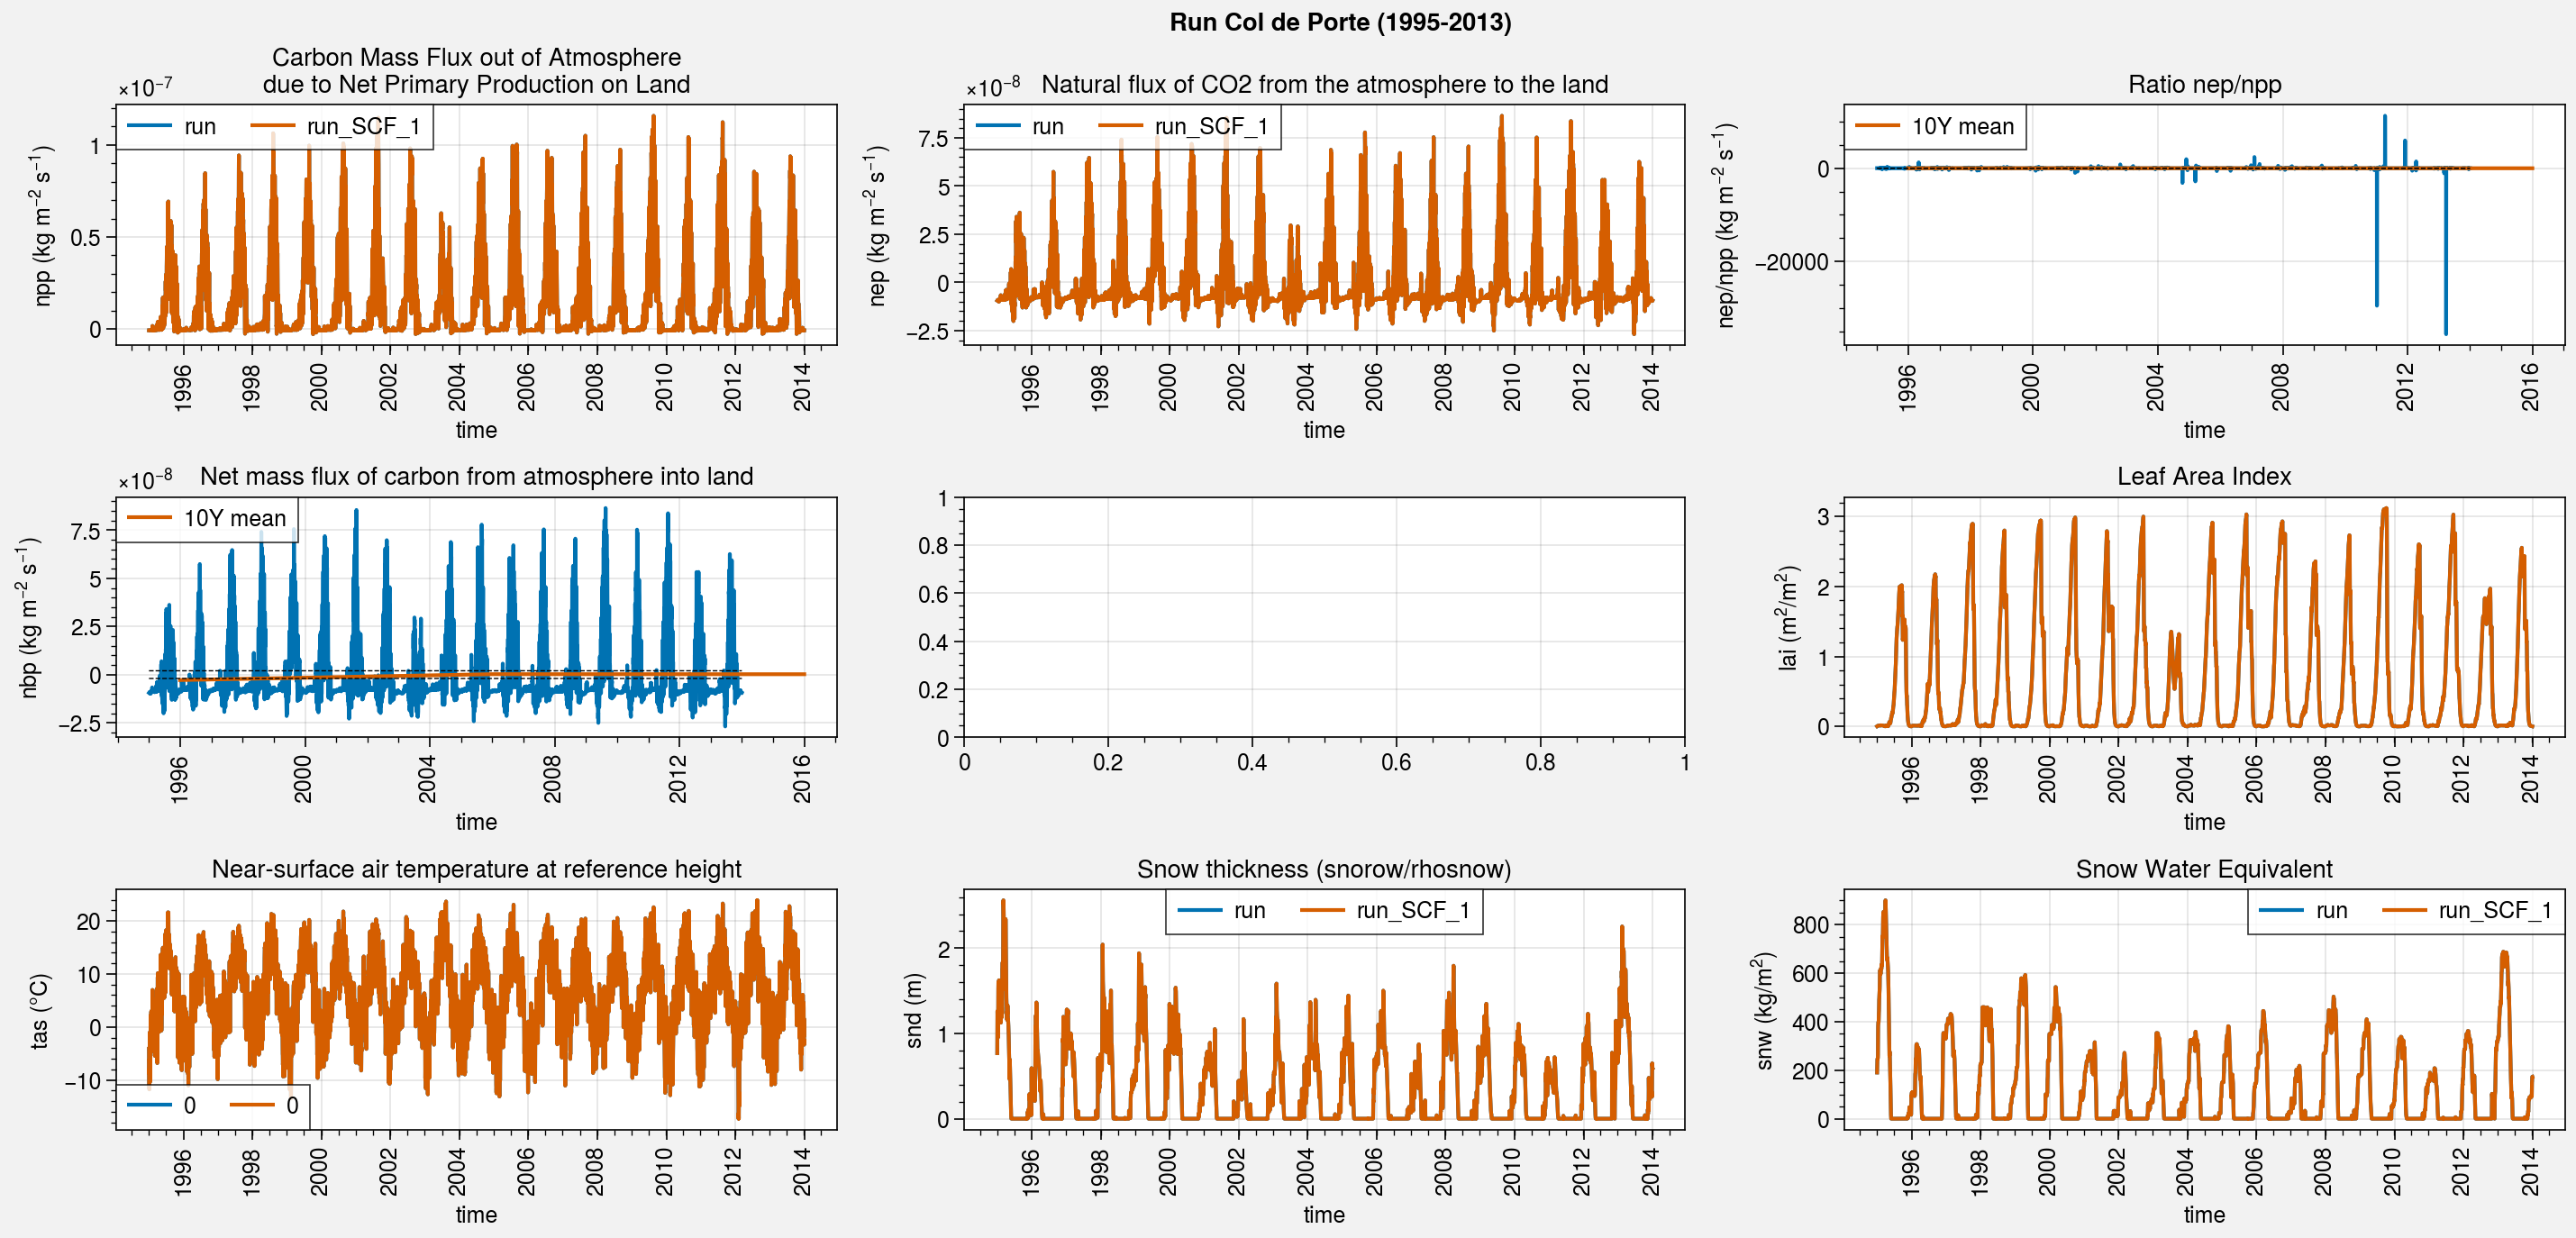

In [8]:
fig, axs = plot.subplots(ncols=3, nrows=3, aspect=3, axwidth=4, share=0)

# npp
axs[0].plot(npp_daily, label=label)
axs[0].plot(npp_daily2, label=label2)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp_daily.units+')')
axs[0].legend()

# nep
axs[1].plot(nep_daily, label=label)
axs[1].plot(nep_daily2, label=label2)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep_daily.units+')')
axs[1].legend()

# nep/npp
axs[2].plot(nep_daily/npp_daily)
k = axs[2].plot((nep_daily/npp_daily).resample(time='10Y').mean(), label='10Y mean')
axs[2].plot(nep_daily*0+0.2, color='k', lw=0.5, ls='--')
axs[2].plot(nep_daily*0-0.2, color='k', lw=0.5, ls='--')
axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep_daily.units+')')
axs[2].legend(k)

# nbp
axs[3].plot(nbp_daily)
axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp_daily.units+')')
k = axs[3].plot(nbp_daily.resample(time='10Y').mean(), label='10Y mean')
axs[3].plot(nbp_daily*0+0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].plot(nbp_daily*0-0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].legend(k)

# cSoil
# axs[4].plot(cSoil_daily)
# axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil_daily.units+')')

# lai
axs[5].plot(lai_daily, label=label)
axs[5].plot(lai_daily2, label=label2)
axs[5].format(title=lai_daily.long_name, ylabel='lai ('+lai_daily.units+')')

# tas
axs[6].plot(tas_daily-273.15)
axs[6].plot(tas_daily2-273.15)
axs[6].format(title=tas_daily.long_name, ylabel='tas (°C)')
axs[6].legend()

# snd
axs[7].plot(snd_daily, label=label)
axs[7].plot(snd_daily2, label=label2)
axs[7].format(title=snd_daily.long_name, ylabel='snd ('+snd_daily.units+')')
axs[7].legend()

# snw
axs[8].plot(snw_daily, label=label)
axs[8].plot(snw_daily2, label=label2)
axs[8].format(title='Snow Water Equivalent', ylabel='snw ('+snw_daily.units+')')
axs[8].legend()

fig.suptitle('Run Col de Porte (1995-2013)')

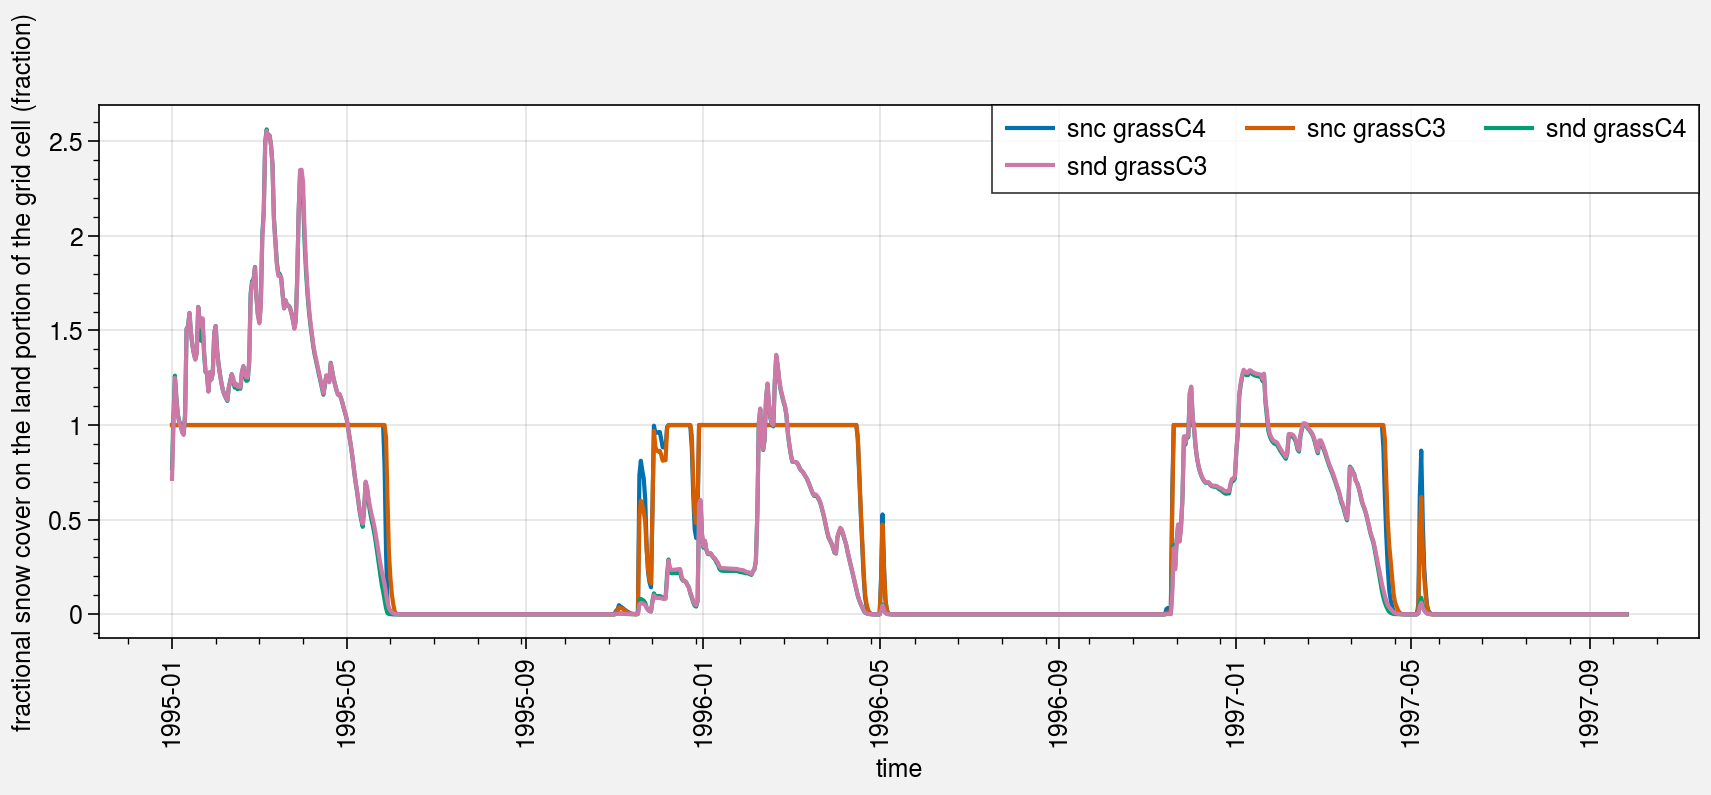

In [14]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=3, axwidth=8)

i_start = 0
i_end = 1000

axs[0].plot(snc_daily[0:i_end], label="snc grassC4")
axs[0].plot(snc_daily2[0:i_end], label="snc grassC3")
axs[0].plot(snd_daily[0:i_end], label="snd grassC4")
axs[0].plot(snd_daily2[0:i_end], label="snd grassC3")
# axs[0].plot(snw[0:24])

axs[0].legend()


In [38]:
wsnw_daily2.long_name

'The total mass of liquid water contained interstitially within the whole depth of the snow pack of the land portion of a grid cell divided by the area of the land portion of the cell.'

Text(0.5, 0.98, 'Run Col de Porte (1995-2013)')

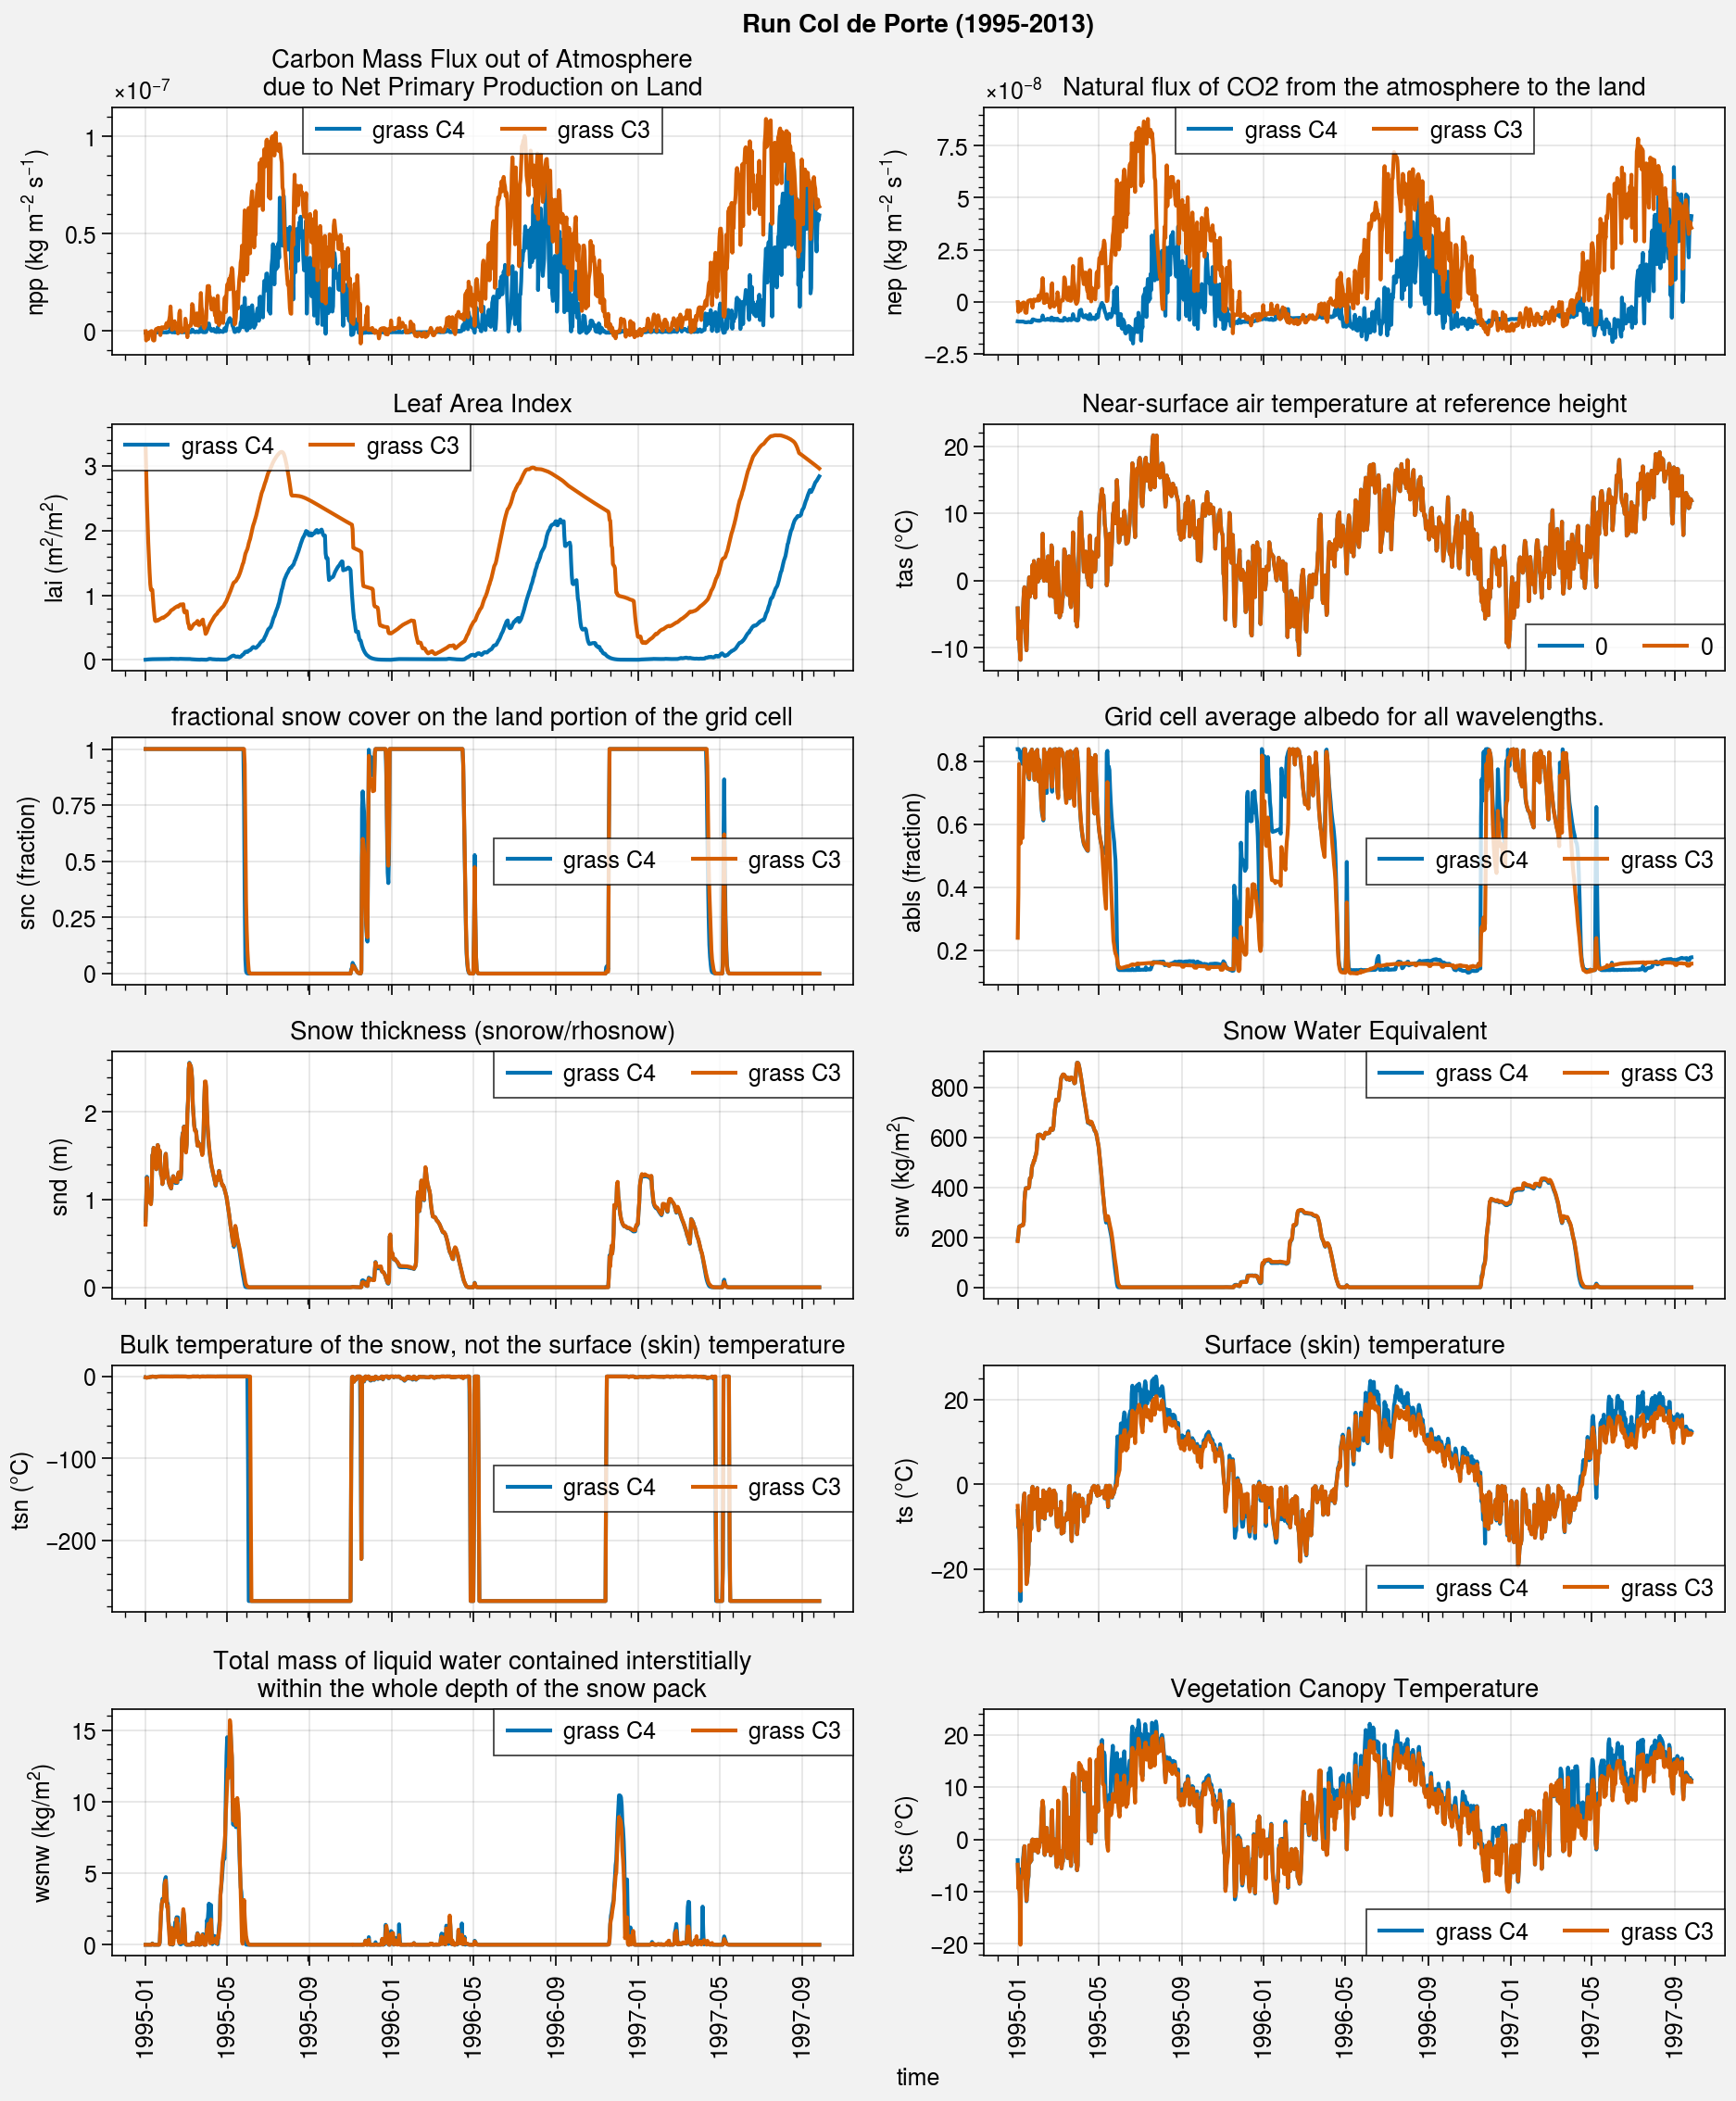

In [52]:
fig, axs = plot.subplots(ncols=2, nrows=6, aspect=3, axwidth=4, sharey=0)

# npp
axs[0].plot(npp_daily[0:i_end], label=label)
axs[0].plot(npp_daily2[0:i_end], label=label2)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp_daily.units+')')
axs[0].legend()

# nep
axs[1].plot(nep_daily[0:i_end], label=label)
axs[1].plot(nep_daily2[0:i_end], label=label2)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep_daily.units+')')
axs[1].legend()

# lai
axs[2].plot(lai_daily[0:i_end], label=label)
axs[2].plot(lai_daily2[0:i_end], label=label2)
axs[2].format(title=lai_daily.long_name, ylabel='lai ('+lai_daily.units+')')
axs[2].legend()

# tas
axs[3].plot(tas_daily[0:i_end]-273.15)
axs[3].plot(tas_daily2[0:i_end]-273.15)
axs[3].format(title=tas_daily.long_name, ylabel='tas (°C)')
axs[3].legend()

# snc
axs[4].plot(snc_daily[0:i_end], label=label)
axs[4].plot(snc_daily2[0:i_end], label=label2)
axs[4].format(title=snc_daily.long_name, ylabel='snc ('+snc_daily.units+')')
axs[4].legend()

# abls
axs[5].plot(albs_daily[0:i_end], label=label)
axs[5].plot(albs_daily2[0:i_end], label=label2)
axs[5].format(title=albs_daily.long_name, ylabel='abls ('+albs_daily.units+')')
axs[5].legend()

# snd
axs[6].plot(snd_daily[0:i_end], label=label)
axs[6].plot(snd_daily2[0:i_end], label=label2)
axs[6].format(title=snd_daily.long_name, ylabel='snd ('+snd_daily.units+')')
axs[6].legend()

# snw
axs[7].plot(snw_daily[0:i_end], label=label)
axs[7].plot(snw_daily2[0:i_end], label=label2)
axs[7].format(title='Snow Water Equivalent', ylabel='snw ('+snw_daily.units+')')
axs[7].legend()

# tsn
axs[8].plot(tsn_daily[0:i_end]-273.5, label=label)
axs[8].plot(tsn_daily2[0:i_end]-273.5, label=label2)
axs[8].format(title=tsn_daily.long_name, ylabel='tsn (°C)')
axs[8].legend()

# ts
axs[9].plot(ts_daily[0:i_end]-273.5, label=label)
axs[9].plot(ts_daily2[0:i_end]-273.5, label=label2)
axs[9].format(title=ts_daily.long_name, ylabel='ts (°C)')
axs[9].legend()

# wsnw
axs[10].plot(wsnw_daily[0:i_end], label=label)
axs[10].plot(wsnw_daily2[0:i_end], label=label2)
axs[10].format(title='Total mass of liquid water contained interstitially\nwithin the whole depth of the snow pack', ylabel='wsnw ('+snw_daily.units+')')
axs[10].legend()

# tcs
axs[11].plot(tcs_daily[0:i_end], label=label)
axs[11].plot(tcs_daily2[0:i_end], label=label2)
axs[11].format(title=tcs_daily.long_name, ylabel='tcs (°C)')
axs[11].legend()


# tsl_daily = xr.open_dataset(path+'/tsl_'+freq+'.nc').tsl
# tcs_daily = xr.open_dataset(path+'/tcs_'+freq+'.nc').tcs



fig.suptitle('Run Col de Porte (1995-2013)')

In [29]:
tsl_daily.long_name

'Temperature of each soil layer. Reported as missing for grid cells with no land.'

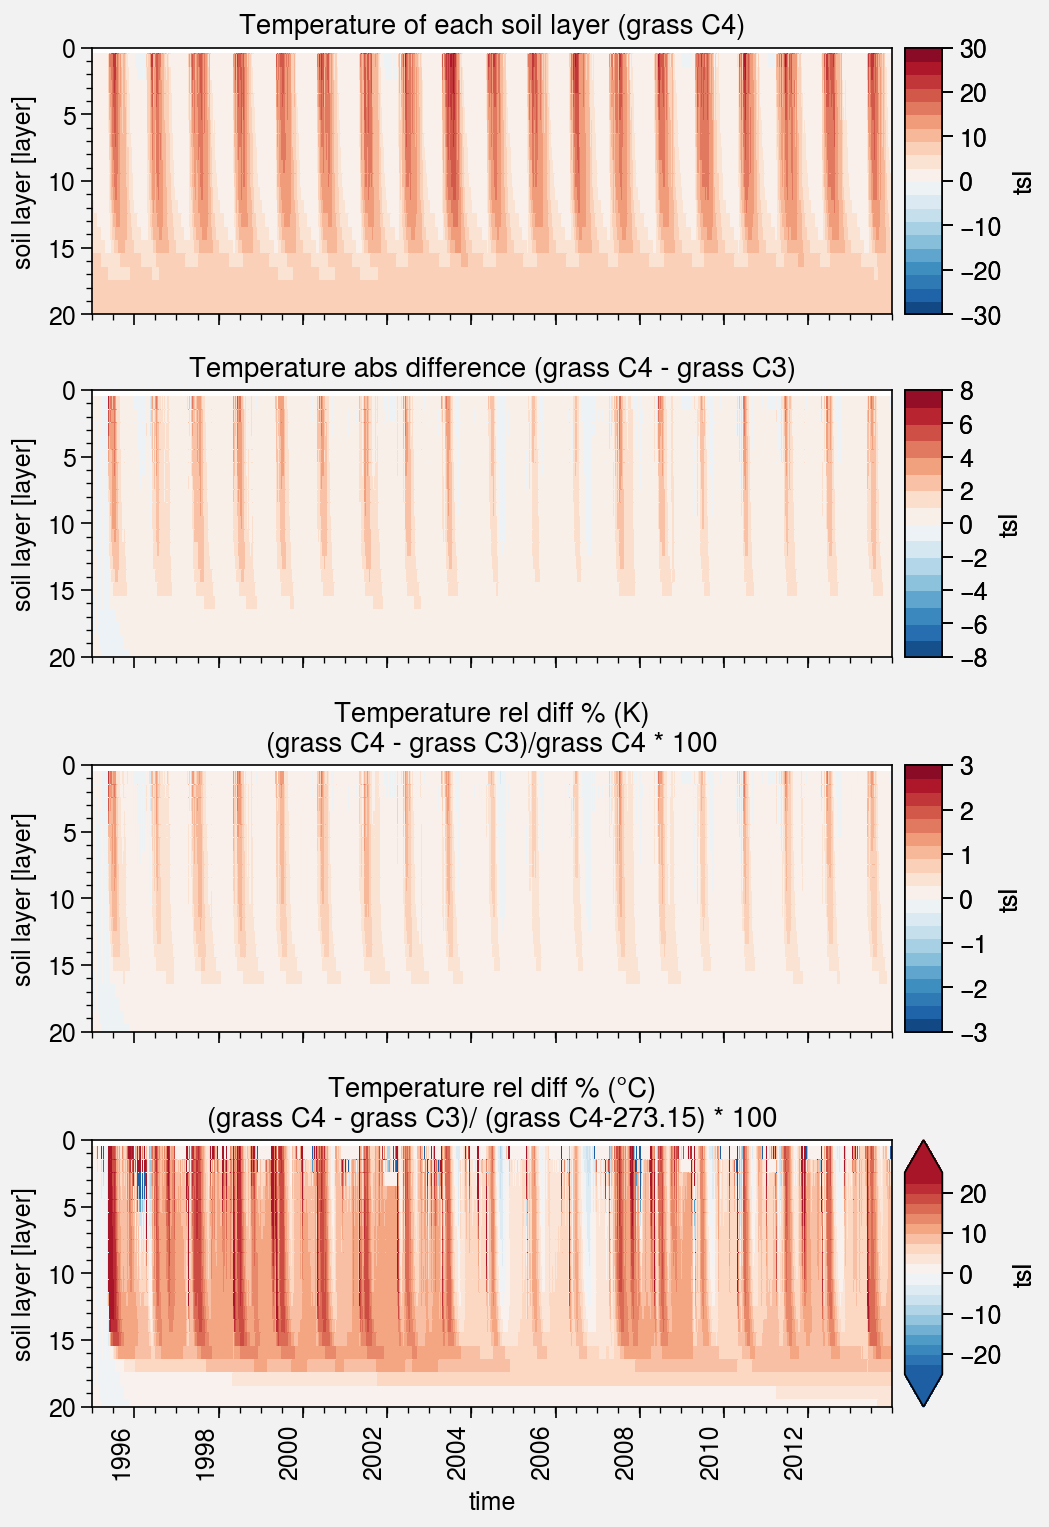

In [34]:
fig, axs = plot.subplots(ncols=1, nrows=4, aspect=3, axwidth=4, sharey=0)

(tsl_daily-273.15).plot(x='time', ylim=(20, 0), ax=axs[0], levels=20)
axs[0].format(title='Temperature of each soil layer (grass C4)')

(tsl_daily - tsl_daily2).plot(x='time', ylim=(20, 0), ax=axs[1], levels=20)
axs[1].format(title='Temperature abs difference (grass C4 - grass C3)')

((tsl_daily - tsl_daily2)/tsl_daily * 100).plot(x='time', ylim=(20, 0), ax=axs[2], levels=20)
axs[2].format(title='Temperature rel diff % (K)\n(grass C4 - grass C3)/grass C4 * 100')

((tsl_daily - tsl_daily2)/ (tsl_daily-273.15) * 100).plot(x='time', ylim=(20, 0), ax=axs[3], levels=20, robust=True)
axs[3].format(title='Temperature rel diff % (°C)\n(grass C4 - grass C3)/ (grass C4-273.15) * 100')
